In [1]:
RECOMPUTE = False

In [2]:
import winobias
from experiment import Model
from attention_utils import report_interventions_summary, report_intervention, perform_interventions
from pytorch_transformers import GPT2Tokenizer
import json

## Results (filtering on odds ratio): 

In [3]:
quantile = 0.25
model = Model(output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
examples = winobias.load_dev_examples()

# TODO: CHANGE

df = winobias.analyze(examples)
df_expected = df[df.odds_ratio > 1]
threshold = df_expected.odds_ratio.quantile(quantile)

filtered_examples = []
assert len(examples) == len(df)
for i in range(len(examples)):
	ex = examples[i]
	odds_ratio = df.iloc[i].odds_ratio
	if odds_ratio > threshold:

		filtered_examples.append(ex)
print(f'Num examples with odds ratio > 1: {len(df_expected)} / {len(examples)}')


print(f'Num examples with odds ratio > {threshold:.4f} ({quantile} quantile): {len(filtered_examples)} / {len(examples)}')
		 
examples = filtered_examples

interventions = [ex.to_intervention(tokenizer) for ex in examples]

fname = 'winobias_attn_int.json'
if RECOMPUTE:
	results = perform_interventions(interventions, model)
	with open(fname, 'w') as f:
		json.dump(results, f)
with open(fname) as f:
	results = json.load(f)

Split: DEV, Filtered: False
Loaded 160 pairs. Skipped 38 pairs.
Num examples with odds ratio > 1: 116 / 160
Num examples with odds ratio > 1.0497 (0.25 quantile): 87 / 160


100%|██████████| 87/87 [49:39<00:00, 34.25s/it]


### Mean Effect

*** SUMMARY ***
Num interventions: 87
Mean total effect: 1.25


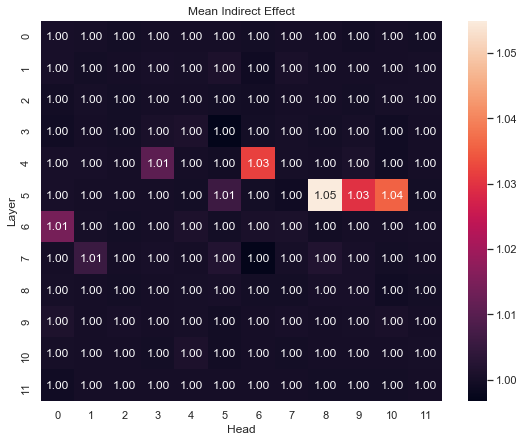

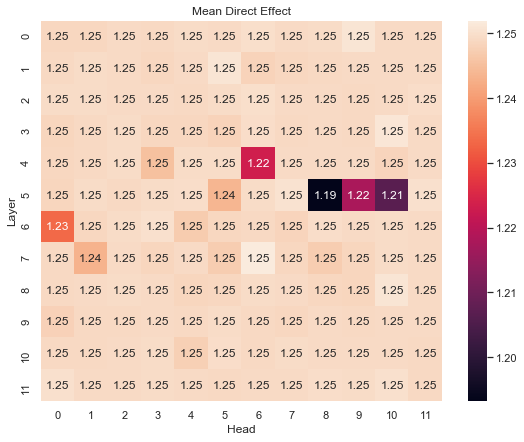

In [4]:
report_interventions_summary(results)

### Examples
	

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.21893
p(c2|x') / p(c1|x') = 0.23095

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) = 1.055


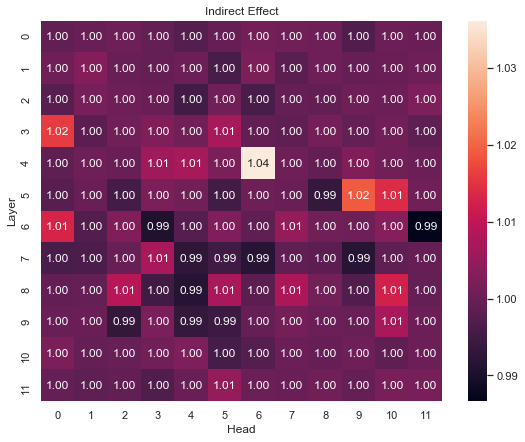

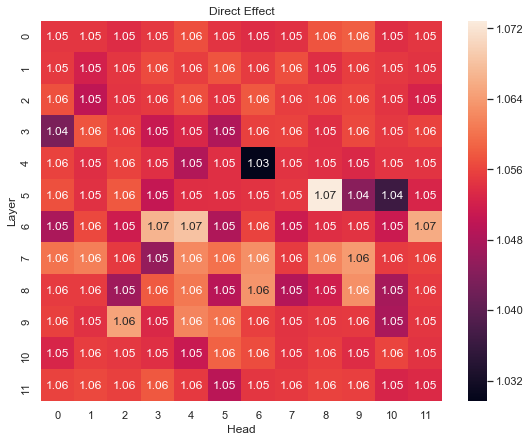

In [5]:
report_intervention(results[0])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.86830
p(c2|x') / p(c1|x') = 1.04329

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) = 1.202


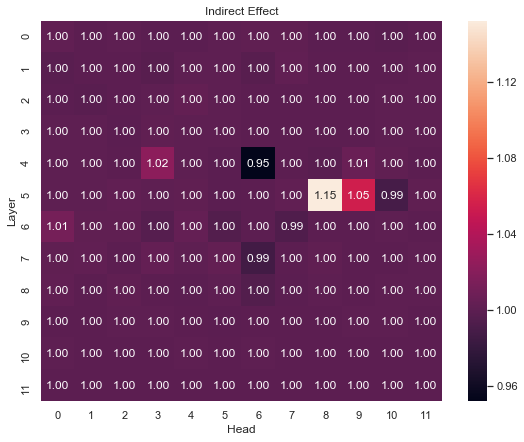

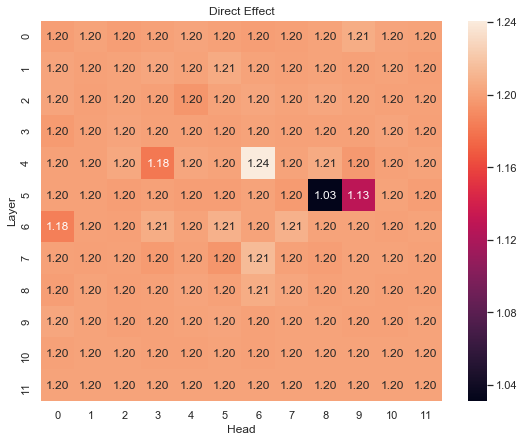

In [6]:
report_intervention(results[1])

x : The physician told the baker that she
x': The physician told the baker that he
c1: had cancer .
c2: tried the best .

p(c2|x) / p(c1|x) = 0.16555
p(c2|x') / p(c1|x') = 0.21632

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) = 1.307


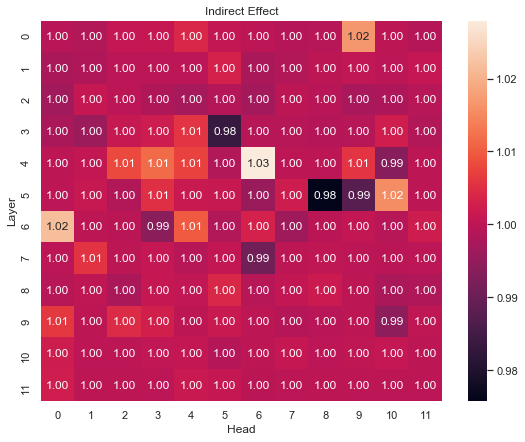

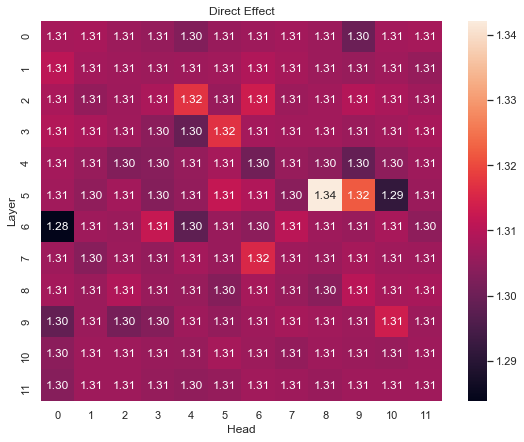

In [7]:
report_intervention(results[2])

x : The farmer offered apples to the housekeeper, because she
x': The farmer offered apples to the housekeeper, because he
c1: might like them .
c2: had too many of them .

p(c2|x) / p(c1|x) = 2.90503
p(c2|x') / p(c1|x') = 4.27356

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) = 1.471


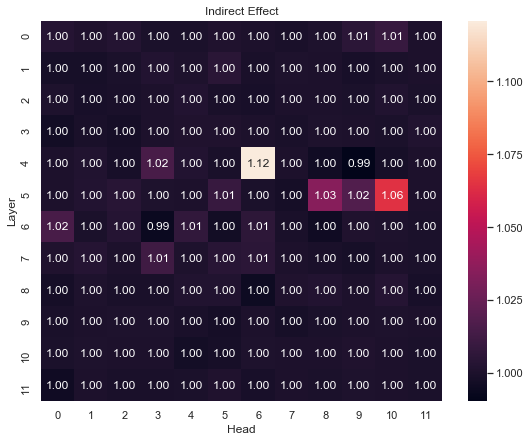

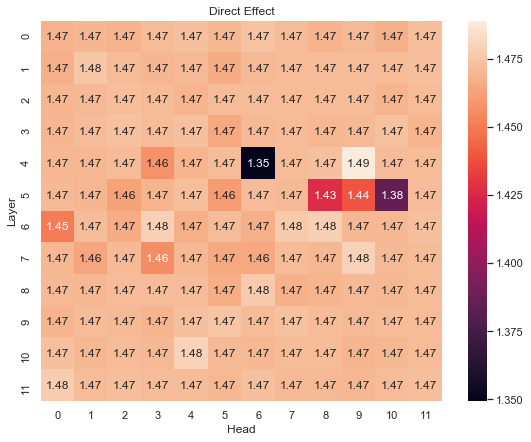

In [8]:
report_intervention(results[3])
